In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

anscombe.json		      lgg_tcga		     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [0]:
%cd sample_data

/content/sample_data


In [0]:
cp -avr '/content/drive/My Drive/lgg_tcga' '/content/sample_data/'

'/content/drive/My Drive/lgg_tcga' -> '/content/sample_data/lgg_tcga'
'/content/drive/My Drive/lgg_tcga/meta_linear_CNA.txt' -> '/content/sample_data/lgg_tcga/meta_linear_CNA.txt'
'/content/drive/My Drive/lgg_tcga/meta_methylation_hm450.txt' -> '/content/sample_data/lgg_tcga/meta_methylation_hm450.txt'
'/content/drive/My Drive/lgg_tcga/meta_gistic_genes_amp.txt' -> '/content/sample_data/lgg_tcga/meta_gistic_genes_amp.txt'
'/content/drive/My Drive/lgg_tcga/meta_rppa.txt' -> '/content/sample_data/lgg_tcga/meta_rppa.txt'
'/content/drive/My Drive/lgg_tcga/meta_rppa_Zscores.txt' -> '/content/sample_data/lgg_tcga/meta_rppa_Zscores.txt'
'/content/drive/My Drive/lgg_tcga/meta_RNA_Seq_v2_expression_median.txt' -> '/content/sample_data/lgg_tcga/meta_RNA_Seq_v2_expression_median.txt'
'/content/drive/My Drive/lgg_tcga/cBioPortal_validation_report_lgg_tcga.htm' -> '/content/sample_data/lgg_tcga/cBioPortal_validation_report_lgg_tcga.htm'
'/content/drive/My Drive/lgg_tcga/meta_bcr_clinical_sample.txt

In [0]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 450kB 55.7MB/s 
     |████████████████████████████████| 3.8MB 57.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ae513ca6872a17054116dc723fbcacf3c72d569a2e33c245f381a2fff7e3b407
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation

In [0]:
# if running in colab, this block chooses tf 2.0:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
assert '2.' in tf.__version__  # make sure you're using tf 2.0

In [0]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('/content/drive/My Drive/lgg_tcga/data_bcr_clinical_data_patient.txt',delimiter="\t",header = None)


In [0]:
clinic = dataset.iloc[4:]
clinic = clinic.reset_index()
del clinic['index']
new_header = clinic.iloc[0] #grab the first row for the header
c_d = clinic[1:] #take the data less the header row
c_d.columns = new_header #set the header row as the df header
c_d = c_d.reset_index()
del c_d['index']
c_d

,OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,HISTORY_IONIZING_RT_TO_HEAD,SEIZURE_HISTORY,HEADACHE_HISTORY,SYMP_CHANGES_MENTAL_STATUS,SYMP_CHANGES_VISUAL,SYMP_CHANGES_SENSORY,SYMP_CHANGES_MOTOR_MOVEMENT,RELATED_SYMPTOM_FIRST_PRESENT,FIRST_SYMPTOM_LONGEST_DURATION,ASTHMA_HISTORY,ECZEMA_HISTORY,HAY_FEVER_HISTORY,MOLD_OR_DUST_ALLERGY_HISTORY,ASTHMA_ECZEMA_ALLERGY_FIRST_DIAGNOSIS,FOOD_ALLERGY_HISTORY,FOOD_ALLERGY_TYPES,FOOD_ALLERGY_AGE,ANIMAL_INSECT_ALLERGY_HIST,ANIMAL_INSECT_ALLERGY_AGE,HISTORY_NEOADJUVANT_STEROID_TX,HISTORY_NEOADJUVANT_MEDICATION,VITAL_STATUS,TUMOR_STATUS,FAMILY_HISTORY_OF_CANCER,FAMILY_HISTORY_OF_PRIMARY_BRAIN_TUMOR,IDH1_MUTATION_TEST_INDICATOR,IDH1_MUTATION_TEST_METHOD,IDH1_MUTATION,INHERITED_GENETIC_SYNDROME_INDICATOR,INHERITED_GENETIC_SYNDROME_SPECIFIED,KARNOFSKY_PERFORMANCE_SCORE,ECOG_SCORE,PERFORMANCE_STATUS_TIMING,PERFORMANCE_STATUS_DAYS_TO,RADIATION_TREATMENT_ADJUVANT,TREATMENT_OUTCOME_FIRST_COURSE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,AGE,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,DISEASE_CODE,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,334f715e-08dc-4a29-b8e4-b010b829c478,TCGA-CS-4938,2/15/12,Astrocytoma,G2,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Female,WHITE,NOT HISPANIC OR LATINO,No,No,2005,NO,YES,NO,NO,NO,NO,NO,Seizures,> 181 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],YES,12 - 20 Years,NO,NO,Alive,[Not Available],YES,YES,NO,[Not Available],[Not Available],[Not Available],[Not Available],90,1,Preoperative,-1,[Not Available],[Not Available],[Not Available],31,0,[Not Available],C71.9,9400/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,117.41,DiseaseFree,117.41
1,fc222f23-b3b2-4ac0-bc61-e8e8fa5cc160,TCGA-CS-4941,4/5/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,WHITE,NOT HISPANIC OR LATINO,No,No,2005,NO,[Not Available],YES,[Not Available],[Not Available],[Not Available],[Not Available],Headaches,0 - 30 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],[Not Available],[Not Available],Dead,WITH TUMOR,[Not Available],[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],90,1,Preoperative,77,[Not Available],[Not Available],[Not Available],67,0,[Not Available],C71.9,9401/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,7.69,Recurred/Progressed,0.3
2,230f5fa7-aa36-41ea-b40b-08f520767bd5,TCGA-CS-4942,3/15/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",White Matter,NO,YES,Female,BLACK OR AFRICAN AMERICAN,[Not Available],No,No,2006,NO,YES,NO,YES,NO,YES,YES,Mental Status Changes,0 - 30 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],NO,NO,Dead,WITH TUMOR,NO,NO,NO,[Not Available],[Not Available],NO,[Not Available],90,1,Preoperative,-21,[Not Available],[Not Available],[Not Available],44,0,[Not Available],C71.9,9401/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,43.86,Recurred/Progressed,38.9
3,952dfd5d-e65a-4307-b6a9-2ed2b0d2d9ce,TCGA-CS-4943,3/16/11,Astrocytoma,G3,Left,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,WHITE,[Not Available],No,No,2009,NO,YES,YES,[Not Available],[Not Available],[Not Available],[Not Available],Seizures,> 181 Days,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],YES,Dead,WITH TUMOR,[Not Available],[Not Available],NO,[Not Available],[Not Available],[Not Available],[Not Available],50,4,Preoperative,9,[Not Available],[Not Av

In [0]:
clinic_1 = c_d.groupby(['PATIENT_ID','HISTOLOGICAL_DIAGNOSIS']).size().unstack()
clinic_1 = clinic_1.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)

clinic_2 = c_d.groupby(['PATIENT_ID','GRADE']).size().unstack()
clinic_2 = clinic_2.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_2.columns = 'GRADE_' + clinic_2.columns

clinic_3 = c_d.groupby(['PATIENT_ID','LATERALITY']).size().unstack()
clinic_3 = clinic_3.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_3.columns = 'GLATERALITY_' + clinic_3.columns

clinic_4 = c_d.groupby(['PATIENT_ID','SUPRATENTORIAL_LOCALIZATION']).size().unstack()
clinic_4 = clinic_4.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_4.columns = 'LOCALIZATION_' + clinic_4.columns

clinic_5 = c_d.groupby(['PATIENT_ID','SEX']).size().unstack()
clinic_5 = clinic_5.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)

clinic_6 = c_d.groupby(['PATIENT_ID','RACE']).size().unstack()
clinic_6 = clinic_6.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_6.columns = 'RACE_' + clinic_6.columns

clinic_7 = c_d.groupby(['PATIENT_ID','ETHNICITY']).size().unstack()
clinic_7 = clinic_7.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_7.columns = 'ETHNICITY_' + clinic_7.columns

clinic_8 = c_d.groupby(['PATIENT_ID','RELATED_SYMPTOM_FIRST_PRESENT']).size().unstack()
clinic_8 = clinic_8.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_8.columns = 'RELATED_SYMPTOM_FIRST_PRESENT_' + clinic_8.columns


clinic_9 = c_d.groupby(['PATIENT_ID','FIRST_SYMPTOM_LONGEST_DURATION']).size().unstack()
clinic_9 = clinic_9.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_9.columns = 'FIRST_SYMPTOM_LONGEST_DURATION_' + clinic_9.columns


clinic_13 = c_d.groupby(['PATIENT_ID','IDH1_MUTATION_TEST_METHOD']).size().unstack()
clinic_13 = clinic_13.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_13.columns = 'IDH1_MUTATION_TEST_METHOD_' + clinic_13.columns


clinic_14 = c_d.groupby(['PATIENT_ID','PERFORMANCE_STATUS_TIMING']).size().unstack()
clinic_14 = clinic_14.applymap(lambda x: 0 if pd.isnull(x) else x).astype(int)
clinic_14.columns = 'PERFORMANCE_STATUS_TIMING_' + clinic_14.columns





In [0]:
c_d = c_d.replace({'PROSPECTIVE_COLLECTION': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'RETROSPECTIVE_COLLECTION': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'HISTORY_OTHER_MALIGNANCY': {"No":0, "Yes": 1,'Yes, History of Prior Malignancy':1,'Yes, History of Synchronous/Bilateral Malignancy':1}})
c_d = c_d.replace({'HISTORY_NEOADJUVANT_TRTYN': {"No":0, "Yes": 1,'Yes, Radiation Prior to Resection':1,'Yes, Pharmaceutical Treatment Prior to Resection':1}})
c_d = c_d.replace({'HISTORY_IONIZING_RT_TO_HEAD': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'SEIZURE_HISTORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'HEADACHE_HISTORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'SYMP_CHANGES_MENTAL_STATUS': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'SYMP_CHANGES_VISUAL': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'SYMP_CHANGES_SENSORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'SYMP_CHANGES_MOTOR_MOVEMENT': {"YES": 1, "NO": 0}})


c_d = c_d.replace({'ASTHMA_HISTORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'ECZEMA_HISTORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'HAY_FEVER_HISTORY': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'MOLD_OR_DUST_ALLERGY_HISTORY': {"YES": 1, "NO": 0}})


c_d = c_d.replace({'FOOD_ALLERGY_HISTORY': {"YES": 1, "NO": 0}})

c_d = c_d.replace({'ANIMAL_INSECT_ALLERGY_HIST': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'HISTORY_NEOADJUVANT_STEROID_TX': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'HISTORY_NEOADJUVANT_MEDICATION': {"YES": 1, "NO": 0}})

c_d = c_d.replace({'VITAL_STATUS': {"Alive": 1, "Dead": 0}})

c_d = c_d.replace({'TUMOR_STATUS': {"WITH TUMOR": 1, "TUMOR FREE": 0}})
c_d = c_d.replace({'FAMILY_HISTORY_OF_CANCER': {"YES": 1, "NO": 0}})
c_d = c_d.replace({'FAMILY_HISTORY_OF_PRIMARY_BRAIN_TUMOR': {"YES": 1, "NO": 0}})

#c_d = c_d.replace({'IDH1_MUTATION_TEST_INDICATOR': {"YES": 1, "NO": 0}})
#c_d = c_d.replace({'IDH1_MUTATION': {"YES": 1, "NO": 0}})


#c_d = c_d.replace({'INHERITED_GENETIC_SYNDROME_INDICATOR': {"YES": 1, "NO": 0}})
#c_d = c_d.replace({'INHERITED_GENETIC_SYNDROME_SPECIFIED': {"YES": 1, "NO": 0}})


#c_d = c_d.replace({'RADIATION_TREATMENT_ADJUVANT': {"YES": 1, "NO": 0}})
#c_d = c_d.replace({'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT': {"YES": 1, "NO": 0}})

#c_d = c_d.replace({'TARGETED_MOLECULAR_THERAPY': {"YES": 1, "NO": 0}})

c_d = c_d.replace({'OS_STATUS': {"LIVING": 1, "DECEASED": 0}})
c_d = c_d.replace({'DFS_STATUS': {"Recurred/Progressed": 1, "DiseaseFree": 0}})

In [0]:
c_d_1 = c_d[['PATIENT_ID','AGE','PROSPECTIVE_COLLECTION','RETROSPECTIVE_COLLECTION','HISTORY_OTHER_MALIGNANCY','HISTORY_NEOADJUVANT_TRTYN','HISTORY_IONIZING_RT_TO_HEAD']]

design_matrix = pd.merge(clinic_1, clinic_2, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_3, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_4, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_5, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_6, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_7, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_8, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_9, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_13, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, clinic_14, on = 'PATIENT_ID', how = 'left')
design_matrix = pd.merge(design_matrix, c_d_1, on = 'PATIENT_ID', how = 'left')

columns = ['GLATERALITY_[Not Available]', 'LOCALIZATION_[Not Available]','RACE_[NOT AVAILABLE]','ETHNICITY_[Not Available]', 'RELATED_SYMPTOM_FIRST_PRESENT_[Not Available]','FIRST_SYMPTOM_LONGEST_DURATION_[Not Available]','PERFORMANCE_STATUS_TIMING_[Not Available]','IDH1_MUTATION_TEST_METHOD_[Not Available]','PERFORMANCE_STATUS_TIMING_[Discrepancy]','GRADE_[Discrepancy]']
design_matrix=design_matrix.drop(columns,axis=1)

design_matrix = design_matrix.replace('[Not Available]', np.NaN)
design_matrix = design_matrix.dropna()

In [0]:
design_matrix

,PATIENT_ID,Astrocytoma,Oligoastrocytoma,Oligodendroglioma,GRADE_G2,GRADE_G3,GLATERALITY_Left,GLATERALITY_Midline,GLATERALITY_Right,LOCALIZATION_Cerebral Cortex,"LOCALIZATION_Deep Gray (e.g.basal ganglia, thalamus)",LOCALIZATION_Not listed in Medical Record,LOCALIZATION_White Matter,Female,Male,RACE_AMERICAN INDIAN OR ALASKA NATIVE,RACE_ASIAN,RACE_BLACK OR AFRICAN AMERICAN,RACE_WHITE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO,RELATED_SYMPTOM_FIRST_PRESENT_Headaches,RELATED_SYMPTOM_FIRST_PRESENT_Mental Status Changes,RELATED_SYMPTOM_FIRST_PRESENT_Motor/Movement Changes,RELATED_SYMPTOM_FIRST_PRESENT_Seizures,RELATED_SYMPTOM_FIRST_PRESENT_Sensory Changes,RELATED_SYMPTOM_FIRST_PRESENT_Visual Changes,FIRST_SYMPTOM_LONGEST_DURATION_0 - 30 Days,FIRST_SYMPTOM_LONGEST_DURATION_31 - 90 Days,FIRST_SYMPTOM_LONGEST_DURATION_91 - 180 Days,FIRST_SYMPTOM_LONGEST_DURATION_> 181 Days,IDH1_MUTATION_TEST_METHOD_IHC,IDH1_MUTATION_TEST_METHOD_Sequence Analysis,PERFORMANCE_STATUS_TIMING_Other,PERFORMANCE_STATUS_TIMING_Post-Adjuvant Therapy,PERFORMANCE_STATUS_TIMING_Pre-Adjuvant Therapy,PERFORMANCE_STATUS_TIMING_Preoperative,AGE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,HISTORY_IONIZING_RT_TO_HEAD
0,TCGA-CS-4938,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,31,0.0,1.0,0,0,0.0
1,TCGA-CS-4941,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,67,0.0,1.0,0,0,0.0
2,TCGA-CS-4942,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,44,0.0,1.0,0,0,0.0
3,TCGA-CS-4943,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,37,0.0,1.0,0,0,0.0
4,TCGA-CS-4944,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,0.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,TCGA-WY-A85A,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,20,0.0,1.0,0,0,0.0
511,TCGA-WY-A85B,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,24,0.0,1.0,0,0,0.0
512,TCGA-WY-A85C,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36,0.0,1.0,0,0,0.0
513,TCGA-WY-A85D,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,60,0.0,1.0,0,0,0.0


In [0]:
gene = pd.read_csv("/content/drive/My Drive/lgg_tcga/data_RNA_Seq_v2_mRNA_median_Zscores.txt",delimiter="\t")
gene = np.transpose(gene)
new_header = gene.iloc[0] #grab the first row for the header
gene = gene[2:] #take the data less the header row
gene.columns = new_header #set the header row as the df header
gene = gene.reset_index()
gene

Hugo_Symbol,index,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938-01,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941-01,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942-01,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943-01,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944-01,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [0]:
gene['index'] = gene['index'].str[:-3] #index can be taken as patient ID
gene

Hugo_Symbol,index,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
gene.rename(columns={ gene.columns[0]: "PATIENT_ID" }, inplace = True)
gene

Hugo_Symbol,PATIENT_ID,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
"""
nan_values = gene.isna()
nan_columns = nan_values.any()

columns_with_nan = gene.columns[nan_columns].tolist()
print(columns_with_nan)
"""

'\nnan_values = gene.isna()\nnan_columns = nan_values.any()\n\ncolumns_with_nan = gene.columns[nan_columns].tolist()\nprint(columns_with_nan)\n'

In [0]:
"""
a=gene.isna().mean() * 100
a.describe()
"""

'\na=gene.isna().mean() * 100\na.describe()\n'

In [0]:
merge_features = pd.merge(design_matrix, gene, on="PATIENT_ID", how='left')


In [0]:
a=merge_features.isna().mean() * 100
a.describe()

count    20574.000000
mean         1.482454
std         12.085313
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
dtype: float64

In [0]:
label = c_d[['PATIENT_ID','VITAL_STATUS']]
labeled_gene = pd.merge(merge_features, label, on="PATIENT_ID", how='left')
labeled_gene.loc[labeled_gene['VITAL_STATUS'] =='Dead', 'VITAL_STATUS'] = 1
labeled_gene.loc[labeled_gene['VITAL_STATUS'] =='Alive', 'VITAL_STATUS'] = 0
labeled_gene['VITAL_STATUS'].value_counts()
labeled_gene = labeled_gene.dropna(axis='columns',how='all' )
labeled_gene = labeled_gene.dropna(how='any')


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
labeled_gene

,PATIENT_ID,Astrocytoma,Oligoastrocytoma,Oligodendroglioma,GRADE_G2,GRADE_G3,GLATERALITY_Left,GLATERALITY_Midline,GLATERALITY_Right,LOCALIZATION_Cerebral Cortex,"LOCALIZATION_Deep Gray (e.g.basal ganglia, thalamus)",LOCALIZATION_Not listed in Medical Record,LOCALIZATION_White Matter,Female,Male,RACE_AMERICAN INDIAN OR ALASKA NATIVE,RACE_ASIAN,RACE_BLACK OR AFRICAN AMERICAN,RACE_WHITE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO,RELATED_SYMPTOM_FIRST_PRESENT_Headaches,RELATED_SYMPTOM_FIRST_PRESENT_Mental Status Changes,RELATED_SYMPTOM_FIRST_PRESENT_Motor/Movement Changes,RELATED_SYMPTOM_FIRST_PRESENT_Seizures,RELATED_SYMPTOM_FIRST_PRESENT_Sensory Changes,RELATED_SYMPTOM_FIRST_PRESENT_Visual Changes,FIRST_SYMPTOM_LONGEST_DURATION_0 - 30 Days,FIRST_SYMPTOM_LONGEST_DURATION_31 - 90 Days,FIRST_SYMPTOM_LONGEST_DURATION_91 - 180 Days,FIRST_SYMPTOM_LONGEST_DURATION_> 181 Days,IDH1_MUTATION_TEST_METHOD_IHC,IDH1_MUTATION_TEST_METHOD_Sequence Analysis,PERFORMANCE_STATUS_TIMING_Other,PERFORMANCE_STATUS_TIMING_Post-Adjuvant Therapy,PERFORMANCE_STATUS_TIMING_Pre-Adjuvant Therapy,PERFORMANCE_STATUS_TIMING_Preoperative,AGE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,...,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P,VITAL_STATUS
0,TCGA-CS-4938,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,31,0.0,1.0,...,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607,1
1,TCGA-CS-4941,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,67,0.0,1.0,...,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607,0
2,TCGA-CS-4942,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,44,0.0,1.0,...,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607,0
3,TCGA-CS-4943,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,37,0.0,1.0,...,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607,0
4,TCGA-CS-4944,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,0.0,1.0,...,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TCGA-WY-A85A,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,20,0.0,1.0,...,1.1894,-0.5254,-0.8469,-0.2967,-0.6683,-0.6233,-0.499,0.1975,1.0657,0.6064,-0.0334,0.35

In [0]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(labeled_gene.drop(['PATIENT_ID', 'VITAL_STATUS'], axis=1).values,labeled_gene['VITAL_STATUS'].values, test_size=.2)

y_test = y_test.astype(np.float)

y_train = y_train.astype(np.float)


X_train = X_train.astype(np.float)

X_test = X_test.astype(np.float)

In [0]:
X_train.shape

(400, 20268)

## Feature selection by using PLS

In [0]:


from sklearn.metrics import average_precision_score, roc_auc_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

parameter_sigma = [3,4,5,6,7,8,9]

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=2)

test_roc_mean = []
for p_s in parameter_sigma:

    validation_roc = []
    for result0,result1 in kf.split(X_train):
        #train = X_train[result0]
        #test =  X_train[result1]
        
        X = X_train[result0]
        Y = y_train[result0]
        x = X_train[result1]
        y = y_train[result1]
        #print(X.shape, Y.shape, x.shape, y.shape)
        pls = PLSRegression(n_components=p_s)
        pls.fit(X, Y)

        y_pred = pls.predict(x)
        #print(y_pred.shape)
        y_pred = np.reshape(y_pred,(y.shape[0],))
        y = y.astype(np.float)
        #print(y.shape)
        #print(y_pred.shape)
        roc = roc_auc_score(y, y_pred)
        
        validation_roc.append(roc)

    test_roc_mean.append(round(np.mean(validation_roc),4))
    print("When the number of principle component is {}, the test roc is {}"
          .format(p_s,round(np.mean(validation_roc),4)))

pls_final_model = PLSRegression(n_components=6)
x_scores, y_scores= pls_final_model.fit_transform(X_train, y_train)

When the number of principle component is 3, the test roc is 0.7073
When the number of principle component is 4, the test roc is 0.7148
When the number of principle component is 5, the test roc is 0.733
When the number of principle component is 6, the test roc is 0.7405
When the number of principle component is 7, the test roc is 0.735
When the number of principle component is 8, the test roc is 0.7417
When the number of principle component is 9, the test roc is 0.7306


In [0]:
from sklearn import metrics

In [0]:
x_s_table = pd.DataFrame(x_scores)
loadings = pls_final_model.x_loadings_
X_test_features = np.matmul(X_test,loadings)
from sklearn.linear_model import LogisticRegression

L_R = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R.fit(x_s_table, y_train)

prediction_y = L_R.predict(X_test_features)

print(roc_auc_score(y_test, prediction_y))

0.5919117647058824


In [0]:
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))

Accuracy after feature selection: 0.67


## The Logisitic Regression result without feature selection

In [0]:
## The Logisitic Regression result without feature selection

L_R_no_selection = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R_no_selection.fit(X_train, y_train)

pred_y =  L_R_no_selection.predict(X_test)

roc_auc_score(y_test, pred_y)

0.6838235294117647

In [0]:
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, pred_y))

Accuracy after feature selection: 0.75


## Random forest (include with and withou PLS to compare)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

for depth in range(1,10):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(x_s_table,y_train)
    prediction_y=clf.predict(X_test_features)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 1
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.75
ROC score without feature selection: 0.5317047817047816
Depth: 2
Accuracy after feature selection: 0.73
ROC score after feature selection: 0.5057172557172557
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6278586278586279
Depth: 3
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5498960498960499
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6278586278586279
Depth: 4
Accuracy after feature selection: 0.75
ROC score after feature selection: 0.5691268191268191
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6278586278586279
Depth: 5
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5498960498960499
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6278586278586279
Depth: 6
Accuracy after 

## CNN without PLS

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])


In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
X_train = X_train[..., None]
X_test = X_test[..., None]

In [0]:
X_train.shape

(400, 20268, 1)

In [0]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h = cnn_model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test, y_test))


Epoch 1/10
13/13 [==============================] - 1s 43ms/step - loss: 1.1627 - accuracy: 0.5550 - val_loss: 0.5851 - val_accuracy: 0.8000
Epoch 2/10
13/13 [==============================] - 0s 20ms/step - loss: 0.4843 - accuracy: 0.7975 - val_loss: 0.5520 - val_accuracy: 0.8300
Epoch 3/10
13/13 [==============================] - 0s 21ms/step - loss: 0.2903 - accuracy: 0.8800 - val_loss: 0.6095 - val_accuracy: 0.8300
Epoch 4/10
13/13 [==============================] - 0s 21ms/step - loss: 0.1391 - accuracy: 0.9550 - val_loss: 0.6849 - val_accuracy: 0.7800
Epoch 5/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0515 - accuracy: 0.9950 - val_loss: 0.7119 - val_accuracy: 0.8100
Epoch 6/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.7811 - val_accuracy: 0.8200
Epoch 7/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.6321 - val_accuracy: 0.7900
Epoch 8/10
13

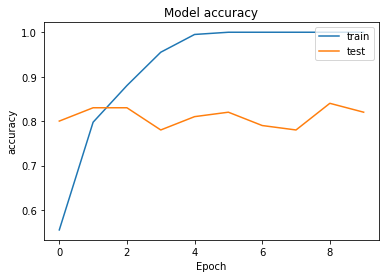

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper right")
plt.show()

## CNN AFTER PLS

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])


In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
x_s_table = np.array(x_s_table)

In [0]:
x_s_table = x_s_table[..., None]
X_test_features = X_test_features[..., None]

In [0]:
x_s_table = tf.convert_to_tensor(x_s_table, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_features = tf.convert_to_tensor(X_test_features, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h2 = cnn_model.fit(x_s_table, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test_features, y_test))


Epoch 1/10
13/13 [==============================] - 0s 20ms/step - loss: 0.9796 - accuracy: 0.7000 - val_loss: 1.1068 - val_accuracy: 0.6600
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2534 - accuracy: 0.9325 - val_loss: 1.9818 - val_accuracy: 0.7400
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1348 - accuracy: 0.9500 - val_loss: 1.4407 - val_accuracy: 0.7900
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0787 - accuracy: 0.9725 - val_loss: 2.8894 - val_accuracy: 0.7600
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0766 - accuracy: 0.9700 - val_loss: 1.8925 - val_accuracy: 0.7900
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0591 - accuracy: 0.9750 - val_loss: 1.9975 - val_accuracy: 0.7800
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9850 - val_loss: 3.1736 - val_accuracy: 0.7800
Epoch 8/10
13/13 [=

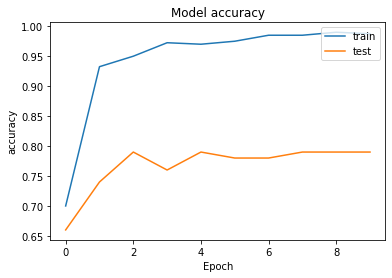

In [0]:
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper right")
plt.show()

## Feature selection by PCR

In [0]:
from sklearn.decomposition import PCA
from sklearn import model_selection

In [0]:
X_train, X_test, y_train, y_test = train_test_split(labeled_gene.drop(['PATIENT_ID', 'VITAL_STATUS'], axis=1).values,labeled_gene['VITAL_STATUS'].values, test_size=.2)
y_test = y_test.astype(np.float)
y_train = y_train.astype(np.float)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

In [0]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [0]:
(pca.components_.T)[:,:8].shape

(20268, 8)

In [0]:
ratio = 0
for i in range (0,80):
  ratio += pca.explained_variance_ratio_[i]
print(ratio)

0.7626199925857517


### Because 80 principal componients could explain 75% variance, so here we choose to take the first 80 PC to do further analysis

In [0]:
X_train_pca = np.matmul(X_train,(pca.components_.T)[:,:80])

In [0]:
X_train_pca.shape

(400, 80)

In [0]:
X_test_pca = np.matmul(X_test,(pca.components_.T)[:,:80])

In [0]:
L_R = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R.fit(X_train_pca, y_train)

prediction_y = L_R.predict(X_test_pca)

print(roc_auc_score(y_test, prediction_y))
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))


0.6632016632016633
Accuracy after feature selection: 0.76


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
for depth in range(1,10):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(X_train_pca,y_train)
    prediction_y=clf.predict(X_test_pca)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 1
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.75
ROC score without feature selection: 0.5317047817047816
Depth: 2
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6403326403326404
Depth: 3
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.79
ROC score without feature selection: 0.6335758835758836
Depth: 4
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.79
ROC score without feature selection: 0.646049896049896
Depth: 5
Accuracy after feature selection: 0.74
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.78
ROC score without feature selection: 0.6392931392931394
Depth: 6
Accuracy after feature selection: 0.74
ROC score after feature selection:

## Random Forest

In [0]:
for depth in range(10,20):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(X_train_pca,y_train)
    prediction_y=clf.predict(X_test_pca)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 10
Accuracy after feature selection: 0.76
ROC score after feature selection: 0.5384615384615384
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6777546777546778
Depth: 11
Accuracy after feature selection: 0.76
ROC score after feature selection: 0.5384615384615384
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6777546777546778
Depth: 12
Accuracy after feature selection: 0.76
ROC score after feature selection: 0.5384615384615384
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6777546777546778
Depth: 13
Accuracy after feature selection: 0.76
ROC score after feature selection: 0.5384615384615384
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6777546777546778
Depth: 14
Accuracy after feature selection: 0.76
ROC score after feature selection: 0.5384615384615384
Accuracy without feature selection: 0.8
ROC score without feature selection: 0.6777546777546778
Depth

## CNN with PCR

In [0]:
X_train_pca = X_train[..., None]
X_test_pca = X_test[..., None]

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
X_train_pca = tf.convert_to_tensor(X_train_pca, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_pca = tf.convert_to_tensor(X_test_pca, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h1 = cnn_model.fit(X_train_pca, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test_pca, y_test))

Epoch 1/10
13/13 [==============================] - 1s 42ms/step - loss: 1.4249 - accuracy: 0.5725 - val_loss: 0.8450 - val_accuracy: 0.4900
Epoch 2/10
13/13 [==============================] - 0s 21ms/step - loss: 0.5056 - accuracy: 0.7700 - val_loss: 0.7269 - val_accuracy: 0.7500
Epoch 3/10
13/13 [==============================] - 0s 20ms/step - loss: 0.3679 - accuracy: 0.8250 - val_loss: 0.7344 - val_accuracy: 0.7900
Epoch 4/10
13/13 [==============================] - 0s 20ms/step - loss: 0.2221 - accuracy: 0.9000 - val_loss: 0.5873 - val_accuracy: 0.7900
Epoch 5/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0886 - accuracy: 0.9700 - val_loss: 0.7153 - val_accuracy: 0.7600
Epoch 6/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0259 - accuracy: 0.9975 - val_loss: 0.9968 - val_accuracy: 0.7100
Epoch 7/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.3081 - val_accuracy: 0.7700
Epoch 8/10
13

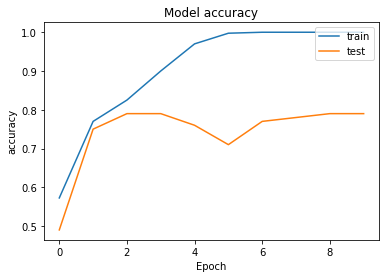

In [0]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper right")
plt.show()